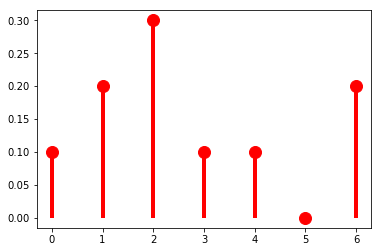

In [2]:
import numpy as np
from scipy import stats
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

In [3]:
R = custm.rvs(size=100)

In [4]:
R

array([1, 1, 2, 4, 2, 6, 6, 0, 3, 4, 1, 1, 2, 0, 6, 6, 6, 3, 2, 1, 6, 0, 6,
       1, 4, 2, 6, 1, 0, 0, 3, 6, 1, 2, 6, 2, 1, 3, 4, 1, 0, 2, 6, 0, 6, 2,
       6, 1, 0, 6, 3, 2, 3, 1, 2, 3, 1, 6, 2, 2, 1, 4, 2, 1, 0, 6, 1, 6, 1,
       2, 6, 1, 0, 2, 6, 2, 1, 2, 6, 2, 2, 6, 1, 2, 1, 2, 6, 2, 4, 2, 6, 0,
       1, 0, 2, 2, 6, 3, 2, 3])

In [10]:
from scipy.stats import rv_discrete

class poisson_gen(rv_discrete):
    "Poisson distribution"
    def _pmf(self, k, mu):
        return np.exp(-mu) * mu**k / np.math.factorial(k)

In [18]:
poisson = poisson_gen(name="poisson")
poisson.pmf(2, 10)

0.0022699964881242427

In [22]:
#poisson.rvs(5)

In [15]:
"""
    Draws a random number from given probability density function.

    Parameters
    ----------
        pdf       -- the function pointer to a probability density function of form P = pdf(x)
        interval  -- the resulting random number is restricted to this interval
        pdfmax    -- the maximum of the probability density function
        integers  -- boolean, indicating if the result is desired as integer
        max_iterations -- maximum number of 'tries' to find a combination of random numbers (rand_x, rand_y) located below the function value calc_y = pdf(rand_x).

    returns a single random number according the pdf distribution.
    """
def draw_random_number_from_pdf(pdf, interval, pdfmax = 1, integers = False, max_iterations = 10000):
    for i in range(max_iterations):
        if integers == True:
            rand_x = np.random.randint(interval[0], interval[1])
        else:
            rand_x = (interval[1] - interval[0]) * np.random.random(1) + interval[0] #(b - a) * random_sample() + a

        rand_y = pdfmax * np.random.random(1) 
        calc_y = pdf(rand_x)

        if(rand_y <= calc_y ):
            return rand_x

    raise Exception("Could not find a matching random number within pdf in " + max_iterations + " iterations.")